**Importando as bibliotecas necessárias como pandas, numpy, matplotlib e scikit-learn.**

In [1]:
# Importa as bibliotecas necessárias
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

**Carregando o conjunto de dados e vendo as váriaveis.**

In [2]:
data = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Explorar e pré-processando os dados verificando se tem dados nulos ou duplicados**

In [3]:
data.isnull().sum() # Verifica se há valores nulos em cada coluna

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
data.duplicated() #Verifica se há linhas duplicadas

0      False
1      False
2      False
3      False
4      False
       ...  
200    False
201    False
202    False
203    False
204    False
Length: 205, dtype: bool

**Visualizando a correlação entre os dados para ter uma compreensão sobre as caracteristicas mais importantes.**

In [5]:
dummie = list(data.select_dtypes('object').columns) #Cria uma lista "dummie" com as colunas que são do tipo "object"

for col in dummie: # Itera sobre cada coluna na lista "dummie"
    onehot = pd.get_dummies(data[col], prefix= col, dtype= int)# Cria variáveis dummy para a coluna "col" e em "onehot"
    data = pd.concat( [data, onehot], axis = 1)# Concatena dataframe data com o dataframe "onehot" ao longo das colunas

data = data.drop(dummie, axis =1) # Remove as colunas originais da lista "dummie" do DataFrame "data"

# Calcula a matriz de correlação
correlation_matrix = data.corr()['price']
correlation_matrix.sort_values(ascending=False)
print(correlation_matrix.to_string())


car_ID                                    -0.109093
symboling                                 -0.079978
wheelbase                                  0.577816
carlength                                  0.682920
carwidth                                   0.759325
carheight                                  0.119336
curbweight                                 0.835305
enginesize                                 0.874145
boreratio                                  0.553173
stroke                                     0.079443
compressionratio                           0.067984
horsepower                                 0.808139
peakrpm                                   -0.085267
citympg                                   -0.685751
highwaympg                                -0.697599
price                                      1.000000
CarName_Nissan versa                      -0.068330
CarName_alfa-romero Quadrifoglio           0.028318
CarName_alfa-romero giulia                 0.001918
CarName_alfa

**Carregando novamente o conjunto.**

In [6]:
data = pd.read_csv('/kaggle/input/car-price-prediction/CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Visualizando as caracteristicas com o auxilio de histograma.**

array([[<Axes: title={'center': 'car_ID'}>,
        <Axes: title={'center': 'symboling'}>,
        <Axes: title={'center': 'wheelbase'}>,
        <Axes: title={'center': 'carlength'}>],
       [<Axes: title={'center': 'carwidth'}>,
        <Axes: title={'center': 'carheight'}>,
        <Axes: title={'center': 'curbweight'}>,
        <Axes: title={'center': 'enginesize'}>],
       [<Axes: title={'center': 'boreratio'}>,
        <Axes: title={'center': 'stroke'}>,
        <Axes: title={'center': 'compressionratio'}>,
        <Axes: title={'center': 'horsepower'}>],
       [<Axes: title={'center': 'peakrpm'}>,
        <Axes: title={'center': 'citympg'}>,
        <Axes: title={'center': 'highwaympg'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

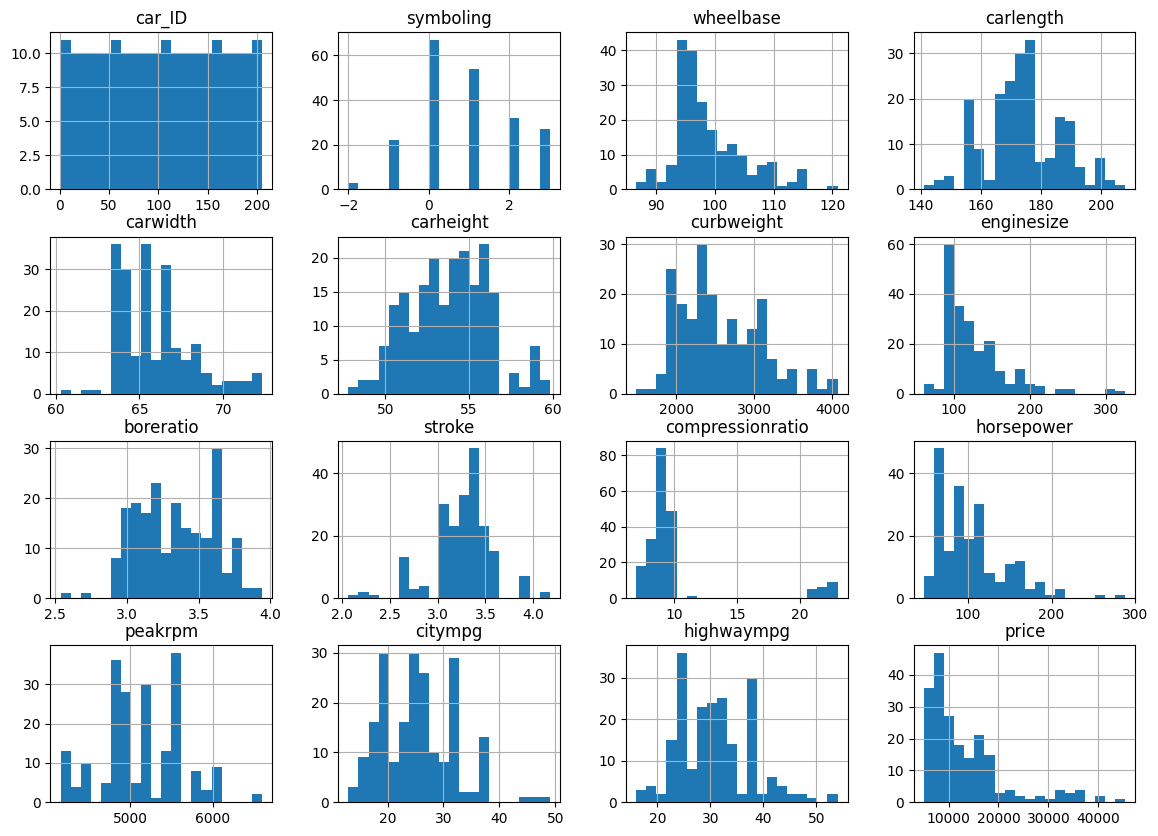

In [7]:
# Cria um histograma para cada coluna numérica do DataFrame "data"
data.hist(figsize = (14,10), bins = 20)

**Excluindo as caracteristicas com pouco valor preditório.**

In [8]:
# Remove as colunas pouco uteis para previsão do DataFrame "data"
data = data.drop(['drivewheel','car_ID','symboling','CarName','enginelocation','fuelsystem'], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   wheelbase         205 non-null    float64
 5   carlength         205 non-null    float64
 6   carwidth          205 non-null    float64
 7   carheight         205 non-null    float64
 8   curbweight        205 non-null    int64  
 9   enginetype        205 non-null    object 
 10  cylindernumber    205 non-null    object 
 11  enginesize        205 non-null    int64  
 12  boreratio         205 non-null    float64
 13  stroke            205 non-null    float64
 14  compressionratio  205 non-null    float64
 15  horsepower        205 non-null    int64  
 16  peakrpm           205 non-null    int64  
 1

**Alocando as caracteristicas preditoras em X.**

In [9]:
X = data.iloc[:, :-1]  # Cria um DataFrame "X" com todas as colunas do DataFrame "data", exceto a última
X

,fueltype,aspiration,doornumber,carbody,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,gas,std,two,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27
1,gas,std,two,convertible,88.6,168.8,64.1,48.8,2548,dohc,four,130,3.47,2.68,9.0,111,5000,21,27
2,gas,std,two,hatchback,94.5,171.2,65.5,52.4,2823,ohcv,six,152,2.68,3.47,9.0,154,5000,19,26
3,gas,std,four,sedan,99.8,176.6,66.2,54.3,2337,ohc,four,109,3.19,3.40,10.0,102,5500,24,30
4,gas,std,four,sedan,99.4,176.6,66.4,54.3,2824,ohc,five,136,3.19,3.40,8.0,115,5500,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,four,sedan,109.1,188.8,68.9,55.5,2952,ohc,four,141,3.78,3.15,9.5,114,5400,23,28
201,gas,turbo,four,sedan,109.1,188.8,68.8,55.5,3049,ohc,four,141,3.78,3.15,8.7,160,5300,19,25
202,gas,std,four,sedan,109.1,188.8,68.9,55.5,3012,ohcv,six,173,3.58,2.87,8.8,134,5500,18,23
203,diesel,turbo,four,sedan,109.1,188.8,68.9,55.5,3217,ohc,six,145,3.01,3.40,23.0,106,4800,26,27


**Alocando a caracteristica a ser prevista em y.**

In [10]:
y = data.iloc[:, -1] # Cria um DataFrame "y" com a última coluna do DataFrame "data"
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

**Aplicando o one-hot encoding nas colunas de tipo não-numéricas.**

In [11]:
dummie = list(data.select_dtypes('object').columns)

for col in dummie:
    onehot = pd.get_dummies(X[col], prefix= col, dtype= int)
    X = pd.concat( [X, onehot], axis = 1)

X = X.drop(dummie, axis =1)


**Visualizando as classes preditoras após o one-hot.**

In [12]:
X

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,1,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,1,0,0,0,0,1,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,1,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,...,0,0,0,0,0,1,0,0,0,0
201,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,...,0,0,0,0,0,1,0,0,0,0
202,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,...,0,1,0,0,0,0,1,0,0,0
203,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,...,0,0,0,0,0,0,1,0,0,0


In [13]:
X.info()  # Exibe informações sobre o DataFrame "X", como tipo de dados de cada coluna e número de valores não nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   wheelbase              205 non-null    float64
 1   carlength              205 non-null    float64
 2   carwidth               205 non-null    float64
 3   carheight              205 non-null    float64
 4   curbweight             205 non-null    int64  
 5   enginesize             205 non-null    int64  
 6   boreratio              205 non-null    float64
 7   stroke                 205 non-null    float64
 8   compressionratio       205 non-null    float64
 9   horsepower             205 non-null    int64  
 10  peakrpm                205 non-null    int64  
 11  citympg                205 non-null    int64  
 12  highwaympg             205 non-null    int64  
 13  fueltype_diesel        205 non-null    int64  
 14  fueltype_gas           205 non-null    int64  
 15  aspira

**Dividindo as váriaveis de treino e teste utilizando o train_test_split.**

In [14]:
# Divide os dados em conjuntos de treinamento e teste, com 80% dos dados para treinamento e 20% para teste com uma seed '42'
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)
(x_train.shape, x_test.shape, y_train.shape, y_test.shape) # Exibe o formato dos conjuntos de treinamento e teste

((164, 38), (41, 38), (164,), (41,))

**Iniciando o modelo de regressão linear e o ajustando aos dados de treinamento.**

In [15]:
modelo = LinearRegression() # Cria um modelo de regressão linear
modelo.fit(x_train, y_train) # Treina o modelo de regressão linear com os dados de treinamento

LinearRegression()

**Fazendo a previsão.**

In [16]:
previsao = modelo.predict(x_test)  # Faz previsões com o modelo treinado usando os dados de teste
previsao # Exibe as previsões

array([31376.66139787, 20503.3854876 , 10787.89362576, 13547.37877825,
       27643.25767633,  5631.3224184 ,  9479.48446608,  7254.53126686,
       10585.60261631,  9807.4802522 , 18129.73586108,  5723.40083989,
       16499.8376971 ,  7824.58469763, 44244.20239627,  6060.03912839,
         506.53502532, 15062.49125817, 10137.46875132, 11630.41363274,
       10289.56966985, 17654.13677407,  6007.7019359 ,  2663.11903923,
        7251.6994845 , 31209.71109867, 13122.13376565, 17072.93914726,
        4938.60760171, 17828.54131862, 27817.82621918,  6427.10335683,
        5815.45890993, 18414.19682003,  8298.93737539, 26639.64502624,
       12424.13617028, 12554.2473586 ,  7039.69490154, 15391.91194961,
        7910.91093753])

**Verificando a acurácia do modelo com os dados de teste.**

In [17]:
acuracia = modelo.score(x_test, y_test)  # Calcula a acurácia usando os dados de teste
print(acuracia)

0.8943247440862003


**Verificando a acurácia do modelo com os dados de treino.**

In [18]:
acuracia2 = modelo.score(x_train, y_train) # Calcula a acurácia usando os dados de treino
print(acuracia2)

0.9381046824214098


**Verificando o desempenho do modelo com métricas de erro e R2 Score.**

In [19]:
mae = mean_absolute_error(y_test, previsao) # Calcula o erro absoluto médio
mse = mean_squared_error(y_test, previsao) # Calcula o erro quadrático médio
r2= r2_score(y_test, previsao) # Calcula o R-quadrado

print("MAE:", mae)
print("MSE:", mse)
print("R2:", r2)

MAE: 2300.340999215441
MSE: 8342429.609322169
R2: 0.8943247440862003


**Visualize a relação entre os preços reais e previstos.**

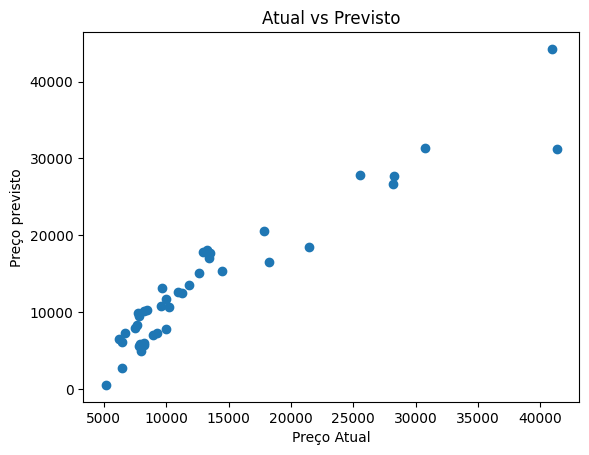

In [20]:
plt.scatter(y_test, previsao) # Cria um gráfico de dispersão usando os dados de teste e previsão
plt.xlabel("Preço Atual")
plt.ylabel("Preço previsto")
plt.title("Atual vs Previsto")
plt.show()